$\Large\textbf{Lab 5.} \large\textbf{Exercise 1.}$



Recall that to solve problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$, the update rule involved in Newton's method is of the form: 
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k (\nabla^2 f(\mathbf{x}^{k}))^{-1} \nabla f(\mathbf{x}^{k}).   
\end{align}

Now we will discuss a method which avoids explicit computation of the inverse of Hessian matrix at each iteration, but is nearly efficient as the Newton's method. This method will be called BFGS named after the famous applied Mathematicians Broyden, Fletcher, Goldfarb and Shanno. 

The main idea of BFGS method is to replace the inverse of Hessian matrix $(\nabla^2 f(\mathbf{x}^{k}))^{-1}$ in the update rule of Newton's method with a surrogate term $B^k$. 

Therefore the update rule of BFGS looks as follows:
\begin{align}
\mathbf{x}^{k+1} = \mathbf{x}^{k} - \eta^k B^k \nabla f(\mathbf{x}^{k})   
\end{align}
where $B^k$ is a surrogate for the inverse of Hessian matrix. 

To find a suitable candidate for $B^k$, we need to consider some favorable characteristics expected from $B^k$: 

\begin{align}
&B^k \text{ is symmetric positive definite}.  \\
&B^k \text{ does not involve computing Hessian or its inverse and should be computable only from the gradients}.  \\
&\text{Replacing  } (\nabla^2 f(\mathbf{x}^{k}))^{-1} \text{ with } B^k \text{ should not slow down the algorithm too much}. \\ 
\end{align}




To design a suitable $B^k$ we shall consider the quadratic approximation of $f$:

\begin{align}
\tilde{f}(\mathbf{x}) = f(\mathbf{x}^{k+1}) + \left \langle \nabla f(\mathbf{x}^{k+1}), \mathbf{x}-\mathbf{x}^{k+1}\right \rangle  + \frac{1}{2} (\mathbf{x}-\mathbf{x}^{k+1})^\top H^{k+1} (\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}
where $H^{k+1} = \nabla^2 f({\mathbf{x}}^{k+1})$.

Note that using this quadratic approximation we have the gradient as:
\begin{align}
\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1}). 
\end{align}

In order to assume $\tilde{f}$ to behave similar to $f$, we expect the following. 

By plugging in $\mathbf{x} = \mathbf{x}^k$ and $\mathbf{x}=\mathbf{x}^{k+1}$, we expect the following from the previous gradient equation:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k) \text{ and }\\ 
\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1}). 
\end{align}

The relation $\nabla \tilde{f} (\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^{k+1})$ directly follows from the gradient relation  $\nabla \tilde{f}(\mathbf{x}) = \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}-\mathbf{x}^{k+1})$.

For the gradient relation to satisfy $\nabla \tilde{f} (\mathbf{x}^k) = \nabla f(\mathbf{x}^k)$ we need:
\begin{align}
\nabla \tilde{f} (\mathbf{x}^k) &= \nabla f(\mathbf{x}^{k+1}) + H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) = \nabla f(\mathbf{x}^k) \\
\implies H^{k+1}(\mathbf{x}^{k}-\mathbf{x}^{k+1}) &= (\nabla f(\mathbf{x}^{k})- \nabla {f} (\mathbf{x}^{k+1})) \\
\implies H^{k+1}(\mathbf{x}^{k+1}-\mathbf{x}^{k}) &= (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k)).
\end{align}
This previous equality is called the $\textbf{secant equation}$. 

From the secant equation we see that inverse of $H^{k+1}$ operates on the difference of gradients $(\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$  to yield the difference of iterates $(\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

The secant equation can be equivalently and compactly written as:
\begin{align}
(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k. 
\end{align}
where $\mathbf{y}^k = (\nabla f(\mathbf{x}^{k+1})- \nabla {f} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$. 

We shall be considering $(H^{k+1})^{-1}$ as a possible choice for $B^{k+1}$ in the BFGS update rule. 

Hence we make sure that $(H^{k+1})^{-1}$ is positive definite. This is equivalent to considering: 
\begin{align}
(\mathbf{y}^{k})^\top (H^{k+1})^{-1} \mathbf{y}^k > 0 
\end{align}
for any non-zero $\mathbf{y}^k$ which implies that $(\mathbf{y}^k)^\top \mathbf{s}^k > 0$. 


Generally solving the secant equation $(H^{k+1})^{-1} \mathbf{y}^k = \mathbf{s}^k$ leads to infinitely many solutions for the matrix $(H^{k+1})^{-1}$ since there are $n^2$ unknowns and $n$ equations. Hence to select a suitable $(H^{k+1})^{-1}$ we solve an optimization problem of the form: 

\begin{align}
\min_H \|H-(H^k)^{-1}\| \ s.t. \ H=H^\top, \ H\mathbf{y}^k=\mathbf{s}^k.
\end{align}
By using an appropriate norm in the optimization problem, we can get the following update rule for the matrix $(H^{k+1})^{-1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) (H^{k})^{-1} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

By taking $B^k = (H^k)^{-1}$, this update rule can now be written as:

$B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$.

As long as $B^k$ is positive definite, the update rule guarantees that $B^{k+1}$ is also positive definite. 

Hence in Exercises 1 and 2, we shall be implementing BFGS method to solve problems of the form $\min_{\mathbf{x}\in{\mathbb{R}}^n} f(\mathbf{x})$, and check its  performance against Newton method. 

Answer 1) We can choose $B^0$ to be a scalar multiple of an identity matrix as it is a symmetric positive definite matrix.

In [ ]:
#Let us now check the time taken for computing the inverse of a matrix A
from timeit import default_timer as timer
import numpy as np 

#create a random nxn matrix 
n = 100
B = np.random.rand(n, n)
A = np.matmul(B,B.T) #Note: This construction ensures that A is symmetric
A = np.add(A, 0.001*np.identity(n)) #this diagonal perturbation helps to make the matrix positive definite 

start_time = timer()
A_inv = np.linalg.inv(A)
end_time = timer()
print('Time taken to compute inverse of A:',end_time - start_time) 

Time taken to compute inverse of A: 0.0009885139988909941


In [ ]:
#Now we will define a function which will compute and return the function value 
def evalf(x, n):  
    #Input: x is a numpy array of size n 
    assert type(x) is np.ndarray 
    assert len(x) == n 
    f = 0
    for i in range(n-1):
        f += (4*(x[i]**2-x[i+1])**2 + (x[i] - 1)**2)

    return (f)


In [ ]:
#Now we will define a function which will compute and return the gradient value as a numpy array 
def evalg(x, n):  
    #Input: x is a numpy array of size n
    assert type(x) is np.ndarray  
    assert len(x) == n 
    gradient = np.zeros(n)
    gradient[0] = 16*x[0]*(x[0]**2 - x[1]) + 2*(x[0]-1)
    gradient[n-1] = 8*(x[n-1] - (x[n-2]**2))
    for i in range(1,n-1):
        gradient[i] = (-8*(x[i-1]**2 - x[i]) + 16*x[i]*(x[i]**2 - x[i+1]) + 2*(x[i]-1))
    return gradient

In [ ]:
def evalh(x,n):
    assert type(x) is np.ndarray  #do not allow arbitrary type arguments 
    assert len(x) == n #do not allow arbitrary size arguments

    hessian = np.zeros((n,n))
    hessian[0][0] = 16*(3*x[0]**2 - x[1]) + 2
    hessian[0][1] = -16*x[0]
    
    hessian[n-1][n-1] = 8
    hessian[n-1][n-2] = -16*x[n-2]
    
    for i in range(1,n-1):
        hessian[i][i] = 16*(3*(x[i]**2)-x[i+1]) + 10
        hessian[i][i-1] = -16*x[i-1]
        hessian[i][i+1] = -16*x[i] 

    return hessian

In [ ]:
def compute_steplength_backtracking(x, n, gradf, D_k, alpha_start, rho, gamma): #add appropriate arguments to the function 
    assert type(x) is np.ndarray and len(gradf) == n
    assert type(gradf) is np.ndarray and len(gradf) == n 
    assert type(alpha_start) is float and alpha_start>=0. 
    assert type(rho) is float and rho>=0.
    assert type(gamma) is float and gamma>=0. 
    assert type(D_k) is np.ndarray and len(D_k) == n
    
    alpha = alpha_start
    pk = -gradf
    while evalf(np.add(x, alpha*np.dot(D_k,pk)), n) > np.subtract(evalf(x, n), gamma*alpha*np.dot(np.dot(D_k,gradf), gradf)):
    
        alpha = rho*alpha
    
    return alpha

In [ ]:
# Method to construct D_k matrix used in Newton's method
def compute_D_k_newton(x, n):
    assert type(x) is np.ndarray
    assert len(x) == n
    
    return np.linalg.inv(evalh(x, n))

In [ ]:
#line search type 
CONSTANT_STEP_LENGTH = 1
BACKTRACKING_LINE_SEARCH = 2

Code for answer 2)

In [ ]:
def find_minimizer_BFGS(start_x, n, tol, line_search_type, *args):
    assert type(start_x) is np.ndarray  
    assert len(start_x) == n  
    assert type(tol) is float and tol>=0 

    x = start_x
    g_x = evalg(x,n)
    h_x = evalh(x,n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any arguments'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three arguments'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0
    B = np.identity(n)

    while (np.linalg.norm(g_x) > tol): 
        d_k = B
        p = -np.dot(B, g_x)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x, n, g_x, d_k, alpha_start, rho, gamma) 
        elif line_search_type == CONSTANT_STEP_LENGTH: 
            step_length = 1.0
        else:  
            raise ValueError('Line search type unknown')
        
        # Gradient descent steps
        x_next = np.add(x, np.multiply(step_length,p)) 
        s_k = x_next - x
        y_k = evalg(x_next,n) - g_x
        mu_k = 1.0/np.dot(y_k.T, s_k)
        temp = (np.identity(n) - np.multiply(mu_k,np.outer(y_k, s_k.T)))
        B = np.dot(temp.T, np.dot(B, temp)) + np.multiply(mu_k, np.outer(s_k, s_k.T))
        k += 1 
        x = x_next
        g_x = evalg(x,n)
        # print('iter:',k, ' x:', x, ' f(x):', evalf(x,n), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))


    return x, k, evalf(x,n)

Code for answer 4)

In [ ]:
def find_minimizer_Newtonmethod(start_x, n, tol, line_search_type, *args):
    #Input: start_x is a numpy array of size n, tol denotes the tolerance and is a positive float value
    assert type(start_x) is np.ndarray 
    assert len(start_x) == n 
    assert type(tol) is float and tol>=0 

    x = start_x
    g_x = evalg(x,n)
    h_x = evalh(x,n)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
        if args is None:
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive any arguments'
            raise ValueError(err_msg)
        elif len(args)<3 :
            err_msg = 'Line search type: BACKTRACKING_LINE_SEARCH, but did not receive three arguments'
            raise ValueError(err_msg)
        else:
            alpha_start = float(args[0])
            rho = float(args[1])
            gamma = float(args[2])
    k = 0

    while (np.linalg.norm(g_x) > tol):
        d_k = compute_D_k_newton(x, n)
        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = compute_steplength_backtracking(x, n, g_x, d_k, alpha_start, rho, gamma) 
        elif line_search_type == CONSTANT_STEP_LENGTH: 
            step_length = 1.0
        else:  
            raise ValueError('Line search type unknown')
        
        # Gradient descent steps
        x = np.subtract(x, np.multiply(step_length,np.dot(d_k, g_x))) 
        k += 1 
        g_x = evalg(x,n) 

    return x, k, evalf(x,n)

In [ ]:
n = [1000, 2500, 5000, 7500, 10000]
my_tol= 1e-3
alpha_start = 0.9
rho = 0.5
gamma = 0.5

Code for answer 3)

In [ ]:
minimizer_bfgs = [0 for i in range(5)]
iters_bfgs  = [0 for i in range(5)]
min_fval_bfgs = [0 for i in range(5)]
time_taken_bfgs = [0 for i in range(5)]


for i in range(5):
    my_start_x = np.zeros(n[i])  
    start_time = timer()
    minimizer_bfgs[i] , iters_bfgs[i] , min_fval_bfgs[i] = find_minimizer_BFGS(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
    end_time = timer()
    time_taken_bfgs[i] = end_time - start_time
    print("n:", n[i])
    print("Minimum function value:", min_fval_bfgs[i])
    print("No of iterations:", iters_bfgs[i])
    print("Time taken:", time_taken_bfgs[i])
    print("Minimizer:", minimizer_bfgs[i])
    print("\n***************************************************************************************************************************************")

n: 1000
Minimum function value: 1.509765174423235e-08
No of iterations: 63
Time taken: 42.113621098
Minimizer: [0.99999852 0.99999906 0.9999996  0.9999995  0.99999973 0.99999922
 0.99999952 0.9999991  0.99999961 0.99999917 0.9999997  0.99999908
 0.99999979 0.99999914 0.99999967 0.99999946 0.99999961 0.99999945
 0.99999955 0.99999931 0.99999955 0.99999935 0.99999957 0.99999932
 0.99999961 0.9999992  0.99999951 0.9999991  0.9999995  0.99999901
 0.99999955 0.99999917 0.99999956 0.99999931 0.99999983 0.99999962
 0.99999978 0.99999982 0.99999934 0.99999965 0.99999905 0.99999996
 0.9999986  0.99999947 0.99999939 0.9999995  0.99999963 0.99999989
 0.99999907 0.99999939 0.99999942 0.9999995  0.99999965 0.99999877
 1.00000031 0.9999991  0.99999916 0.99999986 0.99999922 0.99999951
 0.99999944 0.99999945 0.99999945 0.99999945 0.99999945 0.99999945
 0.99999945 0.99999945 0.99999945 0.99999945 0.99999945 0.99999945
 0.99999945 0.99999945 0.99999945 0.99999945 0.99999945 0.99999945
 0.99999945 0.9999

In [ ]:
time_taken_bfgs=[42.113621098, 176.241088166, 1572.0553763, 5060.609278034, 11195.230018600003]

Note: Storing time taken by BFGS method (in seconds) in a list so that the values dont get lost.

In [ ]:
print("Time taken by BFGS Method for each n")
print("n \t Time taken")
for i in range(5):
  print(n[i],"\t",time_taken_bfgs[i])

Time taken by BFGS Method for each n
n 	 Time taken
1000 	 42.113621098
2500 	 176.241088166
5000 	 1572.0553763
7500 	 5060.609278034
10000 	 11195.230018600003


Code for answer 5)

In [ ]:
my_tol= 1e-1

In [ ]:
minimizer_newton = [0 for i in range(5)]
iters_newton  = [0 for i in range(5)]
min_fval_newton = [0 for i in range(5)]
time_taken_newton = [0 for i in range(5)]

for i in range(5):
    my_start_x = np.zeros(n[i])
    start_time = timer()
    minimizer_newton[i] , iters_newton[i] , min_fval_newton[i] = find_minimizer_Newtonmethod(my_start_x, n[i], my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
    end_time = timer()
    time_taken_newton[i] = end_time - start_time
    print("n:", n[i])
    print("Minimum function value:", min_fval_newton[i])
    print("No of iterations:", iters_newton[i])
    print("Time taken:", time_taken_newton[i])
    print("Minimizer:", minimizer_newton[i])
    print("\n***************************************************************************************************************************************")

KeyboardInterrupt: ignored

Note: The code was running for more than 4 hours even after taking a tolerance of $10^{-1}$ but it did not terminate for any value of n so I interrupted execution. This might be because computing inverse of a large Hessian matrix takes a lot of time and here our n (size of matrix) is very large. Also, step length is zero so at each iteration, the value of the objective function is the same, so Newton's method is not a suitable algorithm to find the minimum of this function. Hence, I did not run the next cell also.

In [ ]:
print("Time taken by Newton's method for each n")
print("n \t Time taken")
for i in range(5):
  print(n[i],"\t",time_taken_newton[i])

Answer 6)

Note: I have only plotted times taken by BFGS method and not both because of reasons mentioned above.

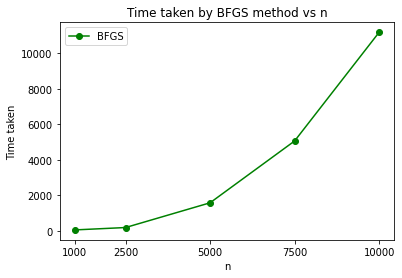

In [ ]:
#we will plot the function values and check the behavior
import matplotlib.pyplot as plt #package useful for plotting
plt.plot(n, time_taken_bfgs, '-o', label='BFGS', color='green')
#plt.plot(n, time_taken_newton, '-o', label="Newton's Method")
plt.xlabel('n')
plt.ylabel('Time taken')
plt.legend()
plt.xticks(n)
plt.title("Time taken by BFGS method vs n")
plt.show()

Observations:

*   Time taken by the BFGS method to find minimizer increases with increase in n.
*   The minimum function value is close to zero and the minimizer is close to $[1,1,...,1] \in R^n$ for all values of n.

